In [68]:
import snsql
from snsql import Privacy
import pandas as pd
from pandasql import sqldf
import time
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 

In [44]:
csv_path = 'aac_intakes_outcomes-Copy1.csv'
dat = pd.read_csv(csv_path)

In [45]:
new_df = dat[['intake_year',
              'age_upon_outcome', 
              'animal_id_outcome',
              'outcome_subtype',
              'outcome_type',
              'sex_upon_outcome',
              'age_upon_outcome_(days)',
              'age_upon_outcome_(years)',
              'outcome_datetime',
              'outcome_weekday',
              'outcome_number',
              'age_upon_intake',
              'animal_id_intake',
              'animal_type',
              'breed',
              'color',
              'found_location',
              'intake_condition',
              'intake_type',
              'sex_upon_intake',
              'age_upon_intake_(days)',
              'age_upon_intake_(years)',
              'intake_datetime',
              'intake_weekday',
              'time_in_shelter_days',
              'intake_month'
             ]]

In [46]:
new_df = new_df[new_df['animal_type'] == 'Dog']
new_df = new_df[new_df['intake_year'] == 2017]

In [47]:
new_df

,intake_year,age_upon_outcome,animal_id_outcome,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),outcome_datetime,outcome_weekday,...,found_location,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),intake_datetime,intake_weekday,time_in_shelter_days,intake_month
0,2017,10 years,A006100,NaN,Return to Owner,Neutered Male,3650,10.000000,2017-12-07 14:07:00,Thursday,...,Colony Creek And Hunters Trace in Austin (TX),Normal,Stray,Neutered Male,3650,10.000000,2017-12-07 00:00:00,Thursday,0.588194,12
36,2017,18 years,A251402,NaN,Return to Owner,Spayed Female,6570,18.000000,2017-10-23 11:32:00,Monday,...,2905 French Place in Austin (TX),Normal,Stray,Spayed Female,6570,18.000000,2017-10-22 18:41:00,Sunday,0.702083,10
58,2017,17 years,A285685,NaN,Return to Owner,Neutered Male,6205,17.000000,2017-04-13 11:56:00,Thursday,...,1704 Nelms Dr #1925 in Austin (TX),Normal,Stray,Neutered Male,6205,17.000000,2017-04-12 16:04:00,Wednesday,0.827778,4
63,2017,15 years,A291843,NaN,Return to Owner,Neutered Male,5475,15.000000,2017-12-12 13:31:00,Tuesday,...,Austin (TX),Normal,Public Assist,Neutered Male,5475,15.000000,2017-12-09 02:11:00,Saturday,3.472222,12
71,2017,15 years,A297699,NaN,Return to Owner,Neutered Male,5475,15.000000,2017-11-20 15:58:00,Monday,...,Westgate in Austin (TX),Aged,Stray,Neutered Male,5475,15.000000,2017-11-20 08:11:00,Monday,0.324306,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77137,2017,1 year,A764534,NaN,Adoption,Spayed Female,365,1.000000,2018-01-05 16:55:00,Friday,...,Walnut Drive East And Georgian Drive in Austin...,Normal,Stray,Intact Female,365,1.000000,2017-12-31 16:29:00,Sunday,5.018056,12
77138,2017,1 year,A764535,Partner,Transfer,Intact Male,365,1.000000,2018-01-04 15:10:00,Thursday,...,124 West Anderson Lane in Austin (TX),Normal,Stray,Intact Male,365,1.000000,2017-12-31 16:54:00,Sunday,3.927778,12
77139,2017,2 months,A764536,Foster,Adoption,Spayed Female,60,0.164384,2018-01-25 17:34:00,Thursday,...,7Th Street And Chicon in Austin (TX),Normal,Stray,Intact Female,30,0.082192,2017-12-31 17:05:00,Sunday,25.020139,12
77140,2017,3 months,A764537,Foster,Adoption,Intact Male,90,0.246575,2018-02-13 16:13:00,Tuesday,...,924 E 51St in Austin (TX),Injured,Stray,Intact Male,30,0.082192,2017-12-31 07:26:00,Sunday,44.365972,12


In [48]:
new_df = new_df.drop(['animal_type', 'intake_year'], axis=1)

In [49]:
def add_dummy_records(df):
    
    start_date = '2017-01-01'
    end_date = '2017-12-31'
    data = df.sample(9851)
    # Get the list of possible values for each column
    age_upon_outcome_values = list(data["age_upon_outcome"])
    animal_id_outcome_values = list(data["animal_id_outcome"])
    outcome_subtype_values = list(data["outcome_subtype"])
    outcome_type_values = list(data["outcome_type"])
    sex_upon_outcome_values = list(data["sex_upon_outcome"])
    age_upon_outcome_days_values = list(data["age_upon_outcome_(days)"])
    age_upon_outcome_years_values = list(data["age_upon_outcome_(years)"])
    outcome_datetime_values = list(data["outcome_datetime"])
    outcome_weekday_values = list(data["outcome_weekday"])
    outcome_number_values = list(data["outcome_number"])
    age_upon_intake_values = list(data["age_upon_intake"])
    animal_id_intake_values = list(data["animal_id_intake"])
    breed_values = list(data["breed"])
    color_values = list(data["color"])
    found_location_values = list(data["found_location"])
    intake_condition_values = list(data["intake_condition"])
    intake_type_values = list(data["intake_type"])
    sex_upon_intake_values = list(data["sex_upon_intake"])
    age_upon_intake_days_values = list(data["age_upon_intake_(days)"])
    age_upon_intake_years_values = list(data["age_upon_intake_(years)"])
    intake_weekday_values = list(data["intake_weekday"])
    time_in_shelter_days_values = list(data["time_in_shelter_days"])
    intake_month_values = list(data["intake_month"])
    
    for date in pd.date_range(start_date, end_date):
        laplace_int = abs(int(np.random.laplace(0, 4, size=1)[0]))
        
         
    
        
        for i in range(laplace_int):
            
            age_upon_outcome = random.choices(age_upon_outcome_values, k=1)[0]
            animal_id_outcome = random.choices(animal_id_outcome_values, k=1)[0]
            outcome_subtype = random.choices(outcome_subtype_values, k=1)[0]
            outcome_type = random.choices(outcome_type_values, k=1)[0]
            sex_upon_outcome = random.choices(sex_upon_outcome_values, k=1)[0]
            age_upon_outcome_days = random.choices(age_upon_outcome_days_values, k=1)[0]
            age_upon_outcome_years = random.choices(age_upon_outcome_years_values, k=1)[0]
            outcome_datetime = random.choices(outcome_datetime_values, k=1)[0]
            outcome_weekday = random.choices(outcome_weekday_values, k=1)[0]
            outcome_number = random.choices(outcome_number_values, k=1)[0]
            age_upon_intake = random.choices(age_upon_intake_values, k=1)[0]
            outcome_datetime = random.choices(outcome_datetime_values, k=1)[0]
            outcome_weekday = random.choices(outcome_weekday_values, k=1)[0]
            outcome_number = random.choices(outcome_number_values, k=1)[0]
            age_upon_intake = random.choices(age_upon_intake_values, k=1)[0]
            animal_id_intake = random.choices(animal_id_intake_values, k=1)[0]
            breed = random.choices(breed_values, k=1)[0]
            color = random.choices(color_values, k=1)[0]
            found_location = random.choices(found_location_values, k=1)[0]
            intake_condition = random.choices(intake_condition_values, k = 1)[0]
            intake_type = random.choices(intake_type_values, k = 1)[0]
            sex_upon_intake = random.choices(sex_upon_intake_values, k = 1)[0]
            age_upon_intake_days = random.choices(age_upon_intake_days_values, k = 1)[0]
            age_upon_intake_years = random.choices(age_upon_intake_years_values, k = 1)[0]
            intake_weekday = random.choices(intake_weekday_values, k = 1)[0]
            time_in_shelter_days = random.choices(time_in_shelter_days_values, k = 1)[0]
            intake_month = random.choices(intake_month_values, k = 1)[0]
            
            data_to_append = {
            'intake_datetime': start_date + '00:00:00',
            'age_upon_outcome': age_upon_outcome,
            'animal_id_outcome': animal_id_outcome,
            'outcome_subtype': outcome_subtype,
            'outcome_type': outcome_type,
            'sex_upon_outcome': sex_upon_outcome,
            'age_upon_outcome_(days)': age_upon_outcome_days,
            'age_upon_outcome_(years)': age_upon_outcome_years,
            'outcome_datetime': outcome_datetime,
            'outcome_weekday': outcome_weekday,
            'outcome_numnber': outcome_number,
            'age_upon_intake': age_upon_intake,
            'animal_id_intake': animal_id_intake,
            'breed': breed,
            'color': color,
            'found_location': found_location,
            'intake_condition': intake_condition,
            'intake_type': intake_type,
            'sex_upon_intake': sex_upon_intake,
            'age_upon_intake_(days)': age_upon_intake_days,
            'age_upon_intake_(years)': age_upon_intake_years,
            'intake_weekday': intake_weekday,
            'time_in_shelter_days': time_in_shelter_days,
            'intake_month': intake_month
        }
            
            data = data.append(data_to_append, ignore_index = True)
            
            
            
    
    
    return data


data = add_dummy_records(new_df)

data

,age_upon_outcome,animal_id_outcome,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),outcome_datetime,outcome_weekday,outcome_number,...,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),intake_datetime,intake_weekday,time_in_shelter_days,intake_month,outcome_numnber
0,2 years,A737407,NaN,Adoption,Neutered Male,730,2.000000,2017-04-12 14:57:00,Wednesday,1.0,...,Normal,Owner Surrender,Neutered Male,730,2.000000,2017-03-23 14:19:00,Thursday,20.026389,3,NaN
1,2 years,A754280,NaN,Return to Owner,Neutered Male,730,2.000000,2017-08-02 18:12:00,Wednesday,1.0,...,Normal,Public Assist,Intact Male,730,2.000000,2017-07-19 15:11:00,Wednesday,14.125694,7,NaN
2,5 years,A759167,NaN,Adoption,Neutered Male,1825,5.000000,2017-10-04 17:22:00,Wednesday,1.0,...,Normal,Stray,Intact Male,1825,5.000000,2017-09-28 11:07:00,Thursday,6.260417,9,NaN
3,3 years,A757239,NaN,Adoption,Neutered Male,1095,3.000000,2017-09-05 14:31:00,Tuesday,1.0,...,Normal,Stray,Neutered Male,1095,3.000000,2017-08-31 16:32:00,Thursday,4.915972,8,NaN
4,3 months,A741478,NaN,Adoption,Neutered Male,90,0.246575,2017-01-07 18:39:00,Saturday,1.0,...,Normal,Stray,Intact Male,60,0.164384,2017-01-02 16:23:00,Monday,5.094444,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11154,4 years,A736462,NaN,Adoption,Neutered Male,365,12.000000,2017-11-14 13:41:00,Tuesday,NaN,...,Normal,Stray,Intact Female,180,1.000000,2017-01-0100:00:00,Sunday,13.245139,10,1.0
11155,5 years,A756735,Partner,Transfer,Unknown,90,5.000000,2017-09-22 11:29:00,Saturday,NaN,...,Normal,Stray,Intact Female,3650,9.000000,2017-01-0100:00:00,Saturday,0.243750,3,1.0
11156,1 year,A756900,Partner,Return to Owner,Intact Female,365,2.000000,2017-03-25 17:29:00,Sunday,NaN,...,Normal,Stray,Intact Male,1460,0.164384,2017-01-0100:00:00,Tuesday,5.212500,2,1.0
11157,2 months,A761762,NaN,Transfer,Neutered Male,365,1.000000,2017-08-03 18:08:00,Sunday,NaN,...,Normal,Stray,Intact Female,365,2.000000,2017-01-0100:00:00,Tuesday,7.274306,7,1.0


In [122]:
df_real = new_df[new_df['intake_datetime'] <= '2017-12-12 18:30:00']
df_dummy = data[data['intake_datetime'] <= '2017-12-12 18:30:00']

In [123]:
query1_real = """
SELECT AVG(time_in_shelter_days) 
FROM df_real
"""

query1_dummied = """
SELECT AVG(time_in_shelter_days) 
FROM df_dummy
"""

query2_real = """
SELECT breed, AVG(time_in_shelter_days) AS avg_time
FROM df_real 
GROUP BY breed
"""

query2_dummied = """
SELECT breed, AVG(time_in_shelter_days) AS avg_time
FROM df_dummy
GROUP BY breed
"""

query3_real = """
SELECT sex_upon_outcome, COUNT(*)
FROM df_real 
GROUP BY sex_upon_outcome
"""

query3_dummied = """
SELECT sex_upon_outcome, COUNT(*)
FROM df_dummy
GROUP BY sex_upon_outcome
"""

In [124]:
x = ["Execution 1", "Execution 2", "Execution 3", "Execution 4", "Execution 5"]

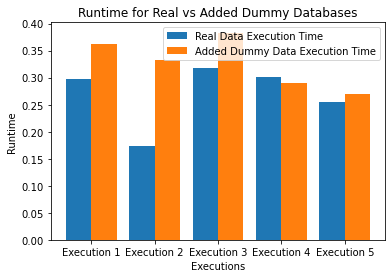

In [125]:
query1_real_times = []
query1_dummy_times = []


for i in range(5):
    t0 = time.time()
    sqldf(query1_real)
    t1 = time.time()

    q1r_time = t1 - t0

    t0 = time.time()
    sqldf(query1_dummied)
    t1 = time.time()

    q1d_time = t1 - t0
    
    query1_real_times.append(q1r_time)
    query1_dummy_times.append(q1d_time)
    

X_axis = np.arange(len(x))
  
plt.bar(X_axis - 0.2, query1_real_times, 0.4, label = 'Real Data Execution Time')
plt.bar(X_axis + 0.2, query1_dummy_times, 0.4, label = 'Added Dummy Data Execution Time')
  
plt.xticks(X_axis, x)
plt.xlabel("Executions")
plt.ylabel("Runtime")
plt.title("Runtime for Real vs Added Dummy Databases")
plt.legend()
plt.show()

In [126]:
#Average Runtime Percent Difference
total_pct = 0
for i in range(5):
    pct = (query1_dummy_times[i] - query1_real_times[i]) / query1_real_times[i]
    total_pct += pct

total_pct/5

0.27420051373352244

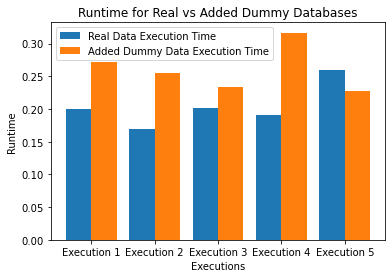

In [128]:
query2_real_times = []
query2_dummy_times = []


for i in range(5):
    t0 = time.time()
    sqldf(query2_real)
    t1 = time.time()

    q2r_time = t1 - t0

    t0 = time.time()
    sqldf(query2_dummied)
    t1 = time.time()

    q2d_time = t1 - t0
    
    query2_real_times.append(q2r_time)
    query2_dummy_times.append(q2d_time)
    

X_axis = np.arange(len(x))
  
plt.bar(X_axis - 0.2, query2_real_times, 0.4, label = 'Real Data Execution Time')
plt.bar(X_axis + 0.2, query2_dummy_times, 0.4, label = 'Added Dummy Data Execution Time')
  
plt.xticks(X_axis, x)
plt.xlabel("Executions")
plt.ylabel("Runtime")
plt.title("Runtime for Real vs Added Dummy Databases")
plt.legend()
plt.show()

In [129]:
#Average Runtime Percent Difference
total_pct = 0
for i in range(5):
    pct = (query2_dummy_times[i] - query2_real_times[i]) / query2_real_times[i]
    total_pct += pct

total_pct/5

0.3139553920767229

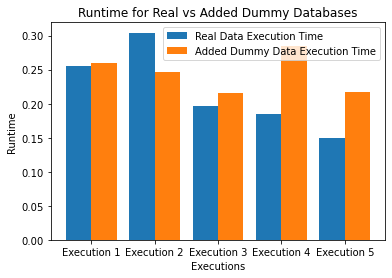

In [130]:
query3_real_times = []
query3_dummy_times = []


for i in range(5):
    t0 = time.time()
    sqldf(query3_real)
    t1 = time.time()

    q3r_time = t1 - t0

    t0 = time.time()
    sqldf(query3_dummied)
    t1 = time.time()

    q3d_time = t1 - t0
    
    query3_real_times.append(q3r_time)
    query3_dummy_times.append(q3d_time)
    

X_axis = np.arange(len(x))
  
plt.bar(X_axis - 0.2, query3_real_times, 0.4, label = 'Real Data Execution Time')
plt.bar(X_axis + 0.2, query3_dummy_times, 0.4, label = 'Added Dummy Data Execution Time')
  
plt.xticks(X_axis, x)
plt.xlabel("Executions")
plt.ylabel("Runtime")
plt.title("Runtime for Real vs Added Dummy Databases")
plt.legend()
plt.show()

In [131]:
#Average Runtime Percent Difference
total_pct = 0
for i in range(5):
    pct = (query3_dummy_times[i] - query3_real_times[i]) / query3_real_times[i]
    total_pct += pct

total_pct/5

0.18598753113003627